### Initializing Pandas to Read CSV

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

condo_price = pd.read_csv('CONDO_PRICE.csv')
electric_price = pd.read_csv('ELECTRICITY_PRICE.csv')
home_price = pd.read_csv('BOSTONHOME_PRICE.csv')
resident_pop = pd.read_csv('RESIDENT_POPULATION.csv')

### Creating a correlation matrix between residents in Boston and the increase of price

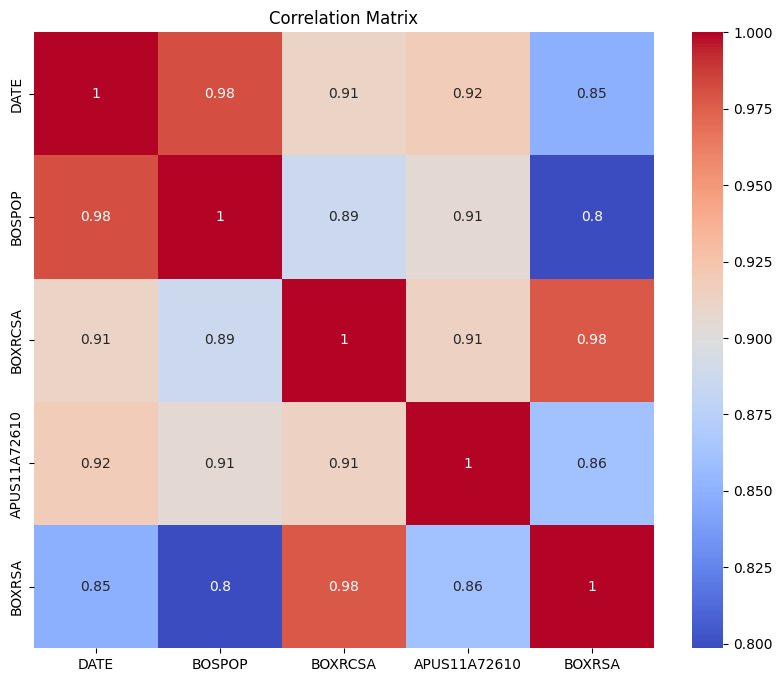

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

resident_pop['DATE'] = pd.to_datetime(resident_pop['DATE'])
condo_price['DATE'] = pd.to_datetime(condo_price['DATE'])
electric_price['DATE'] = pd.to_datetime(electric_price['DATE'])
home_price['DATE'] = pd.to_datetime(home_price['DATE'])

# Merge the datasets on the common column
merged_data = pd.merge(resident_pop, condo_price, on='DATE')
merged_data = pd.merge(merged_data, electric_price, on='DATE')
merged_data = pd.merge(merged_data, home_price, on='DATE')

# Check for missing values
# merged_data.isnull().sum()

# Drop or impute missing values as necessary
# For example: merged_data.dropna(inplace=True)

# Calculate the correlation matrix
corr_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

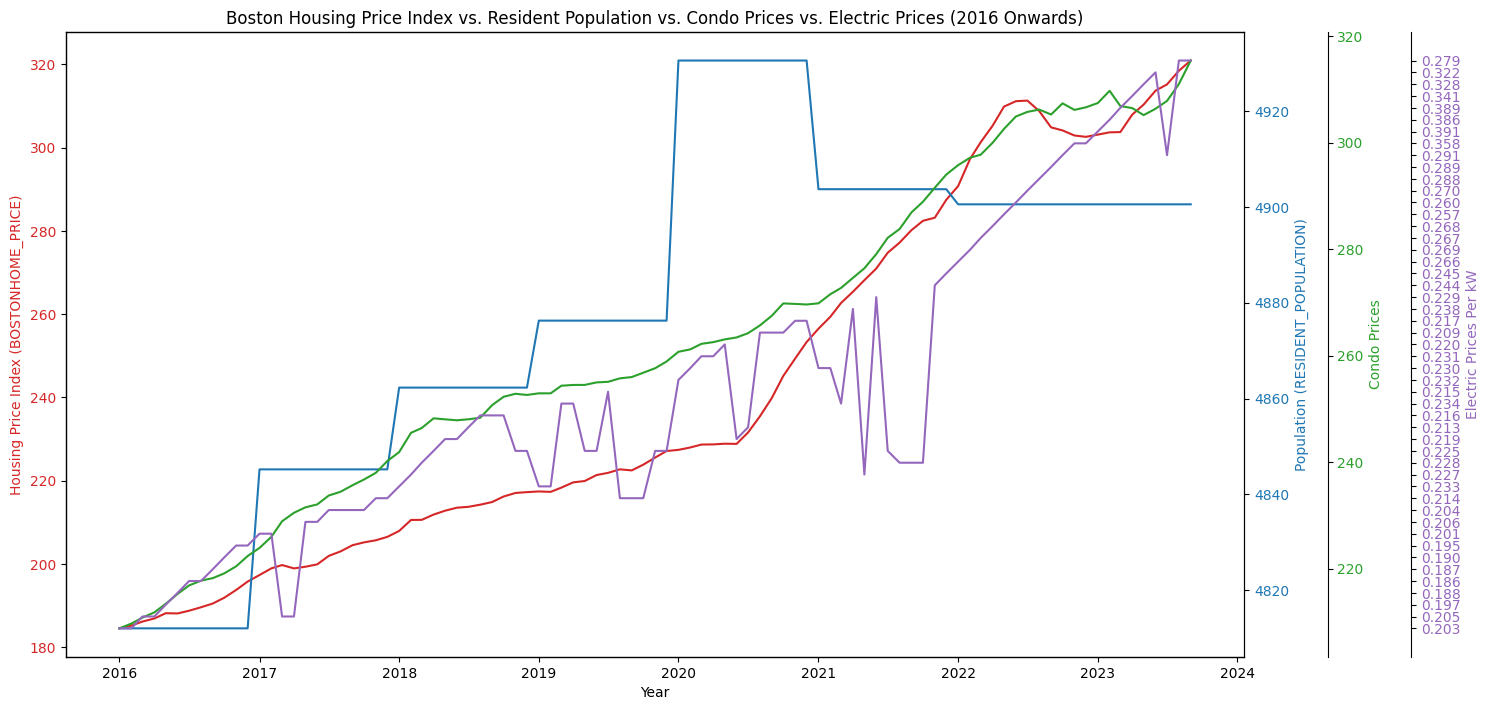

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert DATE columns to datetime for all datasets
resident_pop['DATE'] = pd.to_datetime(resident_pop['DATE'])
home_price['DATE'] = pd.to_datetime(home_price['DATE'])
condo_price['DATE'] = pd.to_datetime(condo_price['DATE'])
electric_price['DATE'] = pd.to_datetime(electric_price['DATE'])

# Filter for dates from 2016 onwards in all datasets
filtered_population_data = resident_pop[resident_pop['DATE'] >= '2016-01-01']
filtered_home_price_data = home_price[home_price['DATE'] >= '2016-01-01']
filtered_condo_price_data = condo_price[condo_price['DATE'] >= '2016-01-01']
filtered_electric_price_data = electric_price[electric_price['DATE'] >= '2016-01-01']

# Merge the datasets on the DATE column
merged_data = pd.merge_asof(filtered_home_price_data.sort_values('DATE'), 
                            filtered_population_data.sort_values('DATE'), on='DATE')
merged_data = pd.merge_asof(merged_data.sort_values('DATE'), 
                            filtered_condo_price_data.sort_values('DATE'), on='DATE')
merged_data = pd.merge_asof(merged_data.sort_values('DATE'), 
                            filtered_electric_price_data.sort_values('DATE'), on='DATE')

# Plotting the time series data for 2016 onwards
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Housing Price Index (BOSTONHOME_PRICE)', color=color)
ax1.plot(merged_data['DATE'], merged_data['BOXRSA'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Population (RESIDENT_POPULATION)', color=color)
ax2.plot(merged_data['DATE'], merged_data['BOSPOP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot for Condo Prices
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Condo Prices', color=color)
ax3.plot(merged_data['DATE'], merged_data['BOXRCSA'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Plot for Electric Prices
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('Electric Prices Per kW', color=color)
ax4.plot(merged_data['DATE'], merged_data['APUS11A72610'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Boston Housing Price Index vs. Resident Population vs. Condo Prices vs. Electric Prices (2016 Onwards)')
plt.show()